# 1st Deliverable

## Preprocessing and Feature Engineering

In [105]:
#Arno
import pandas as pd

### Loading the datasets into pandas dataframes and inspecting them
We had an issue where our data (orignally csv files) were being converted into gsheets which cannot be read by pandas directly, so we followed a [guide](https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550) on how to export gsheets as csv files.

In [106]:
#Arno
baseURL = 'https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv'
primaryID = '1SMsJrWMG4Jbk0HxL9WCEgjsdxt4h4ZlTnNJJ-ocbNAQ'
primaryURL = baseURL.format(primaryID)
secondaryID = '1mgY3svjhBCGfUsnCFkekEqODFip5785FyYB_jOBG0R8'
secondaryURL = baseURL.format(secondaryID)
tertiaryID = '1p5zUjwBjFbCcjgkVU7g3lw5awXoTekTGA25Q6VxDok0'
tertiaryURL = baseURL.format(tertiaryID)

In [107]:
#Arno
primaryDS = pd.read_csv(primaryURL)
primaryDS.info()
primaryColumns = list(primaryDS.columns)
print("\ncolumns =", primaryColumns, "\n")
primaryDS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB

columns = ['Sentiment', 'News Headline'] 



,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [108]:
#Arno
secondaryDS = pd.read_csv(secondaryURL)
secondaryDS.info()
secondaryColumns = list(secondaryDS.columns)
print("\ncolumns =", secondaryColumns, "\n")
secondaryDS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       211 non-null    object
 1   sentiment  211 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB

columns = ['text', 'sentiment'] 



,text,sentiment
0,Global COVID-19 death toll exceeds 4 million.,0
1,"reports 67,208 new COVID-19 cases, 2,330 deaths.",0
2,China reports 23 new COVID-19 cases versus 19 ...,0
3,"India records 91,702 new COVID-19 cases over p...",0
4,sharply raises COVID-19 death toll prompting c...,0


In [109]:
#Arno
tertiaryDS = pd.read_csv(tertiaryURL)
tertiaryDS.info()
tertiaryColumns = list(tertiaryDS.columns)
print("\ncolumns =", tertiaryColumns, "\n")
tertiaryDS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   published_at     598 non-null    object 
 1   title            598 non-null    object 
 2   description      598 non-null    object 
 3   url              598 non-null    object 
 4   sentiment        598 non-null    object 
 5   sentiment_score  598 non-null    float64
dtypes: float64(1), object(5)
memory usage: 28.2+ KB

columns = ['published_at', 'title', 'description', 'url', 'sentiment', 'sentiment_score'] 



,published_at,title,description,url,sentiment,sentiment_score
0,2021-10-21T14:40:39+00:00,Exclusive: Industrialist Nikhil Merchant leads...,Low-profile Gujarat businessman wants to add P...,https://www.businesstoday.in/latest/corporate/...,neutral,0.711336
1,2021-10-21T13:52:13+00:00,India’s Reliance gets shareholders’ nod to add...,BENGALURU &#8212; India&#8217;s Reliance Indus...,https://financialpost.com/pmn/business-pmn/ind...,neutral,0.800176
2,2021-10-21T12:45:52+00:00,Rogers misses quarterly revenue estimates,Rogers Communications Inc reported third-quart...,https://torontosun.com/business/money-news/rog...,negative,0.973185
3,2021-10-21T12:40:35+00:00,Exclusive: Tycoon Nikhil Merchant leads race f...,Low-profile Gujarat businessman wants to add P...,https://www.businesstoday.in/latest/corporate/...,neutral,0.619371
4,2021-10-21T11:43:53+00:00,BP to Open Fuel Station in India Amid Record P...,BP and Reliance Industries signed a $6 billion...,https://sputniknews.com/20211021/bp-to-open-fu...,positive,0.929962


### Removing unnecessary columns
This is only necessary for the tertiary dataset.


In [110]:
#Arno
tertiaryDS = tertiaryDS.drop(labels=["published_at","description","url","sentiment_score"], axis=1)
tertiaryDS.head()

,title,sentiment
0,Exclusive: Industrialist Nikhil Merchant leads...,neutral
1,India’s Reliance gets shareholders’ nod to add...,neutral
2,Rogers misses quarterly revenue estimates,negative
3,Exclusive: Tycoon Nikhil Merchant leads race f...,neutral
4,BP to Open Fuel Station in India Amid Record P...,positive


In [111]:
# Daniel
# Mapping -1,0,1 to sentiment based on previous values (positive,negative,neutral)

primarySentValues = {'negative': -1, 'neutral': 0, 'positive': 1}

primaryDS['Sentiment'] = primaryDS['Sentiment'].map(primarySentValues)
primaryDS.head()

,Sentiment,News Headline
0,0,"According to Gran , the company has no plans t..."
1,0,Technopolis plans to develop in stages an area...
2,-1,The international electronic industry company ...
3,1,With the new production plant the company woul...
4,1,According to the company 's updated strategy f...


In [112]:
# Daniel
secondarySentValues = {0: -1, 1: 0, 2: 1}

secondaryDS['sentiment'] = secondaryDS['sentiment'].map(secondarySentValues)
print(secondaryDS)

                                                  text  sentiment
0        Global COVID-19 death toll exceeds 4 million.         -1
1    reports 67,208 new COVID-19 cases, 2,330 deaths.          -1
2    China reports 23 new COVID-19 cases versus 19 ...         -1
3    India records 91,702 new COVID-19 cases over p...         -1
4    sharply raises COVID-19 death toll prompting c...         -1
..                                                 ...        ...
206  U.S. equity futures were trading higher the mo...          1
207  China, US commerce chiefs to cooperate on hand...          1
208  Stock investors celebrate red-hot five-quarter...          1
209   Wall Street’s roaring 2021 is as good as it gets          1
210  Investor sees 'incredibly strong earnings' in ...          1

[211 rows x 2 columns]


In [113]:
# Daniel
tertiarySentValues = {'negative': -1, 'neutral': 0, 'positive': 1}

tertiaryDS['sentiment'] = tertiaryDS['sentiment'].map(tertiarySentValues)
tertiaryDS.head()

,title,sentiment
0,Exclusive: Industrialist Nikhil Merchant leads...,0
1,India’s Reliance gets shareholders’ nod to add...,0
2,Rogers misses quarterly revenue estimates,-1
3,Exclusive: Tycoon Nikhil Merchant leads race f...,0
4,BP to Open Fuel Station in India Amid Record P...,1


### Combining all three datasets

In [114]:
# Arno
# first though we need to reorder the columns of the primary dataset
primaryDS = primaryDS.reindex(columns=["News Headline","Sentiment"])

In [115]:
# Arno
primaryDS.head()

,News Headline,Sentiment
0,"According to Gran , the company has no plans t...",0
1,Technopolis plans to develop in stages an area...,0
2,The international electronic industry company ...,-1
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1


In [116]:
# Arno
# now we need to standardize the names of the columns - we'll use "original_headline" and "sentiment"
primaryDS = primaryDS.rename(columns={"News Headline":"original_headline","Sentiment":"sentiment"})
secondaryDS = secondaryDS.rename(columns={"text":"original_headline"})
tertiaryDS = tertiaryDS.rename(columns={"title":"original_headline"})

In [117]:
# Arno
primaryDS.head()

,original_headline,sentiment
0,"According to Gran , the company has no plans t...",0
1,Technopolis plans to develop in stages an area...,0
2,The international electronic industry company ...,-1
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1


In [118]:
# Arno
# now we combine them all
data = primaryDS.append(secondaryDS)
data = data.append(tertiaryDS)

In [119]:
# Arno
# let's make sure we got all the data from the original three into our master data dataframe by comparing the row count
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5655 entries, 0 to 597
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_headline  5655 non-null   object
 1   sentiment          5655 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 132.5+ KB


,original_headline,sentiment
0,"According to Gran , the company has no plans t...",0
1,Technopolis plans to develop in stages an area...,0
2,The international electronic industry company ...,-1
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1


In [120]:
# Arno
len(primaryDS)+len(secondaryDS)+len(tertiaryDS)

5655

### Removing rows that have headlines which contain irregular symbols

In [121]:
# Daniel
import regex as re

def clean_h(h):
  # For extra spaces
  h = re.sub(r'\s+', ' ', h)

  # For numerical data
  h = re.sub(r'(\d)\s+percent\b', r'\1%', h)
  h = re.sub(r'(\d)\s+\.(\d)', r'\1.\2', h)
  h = re.sub(r'\s+\.(\d)', r' 0.\1', h)

  # Remove punctuation, but not decimal points
  h = re.sub(r',+|\s\.+|\.+\Z', '', h)
  # Remove spaces for "$", "%", ":", "'s"
  h = re.sub(r'\$+\s+', '$', h)
  h = re.sub(r'\s+%+', '%', h)
  h = re.sub(r'\s+:+', ':', h)
  h = re.sub(r'\s\'s', '\'s', h)

  # Replace "dollar(s)" with "$"
  h = re.sub(r'(\d+(.\d+)?)\s+(dollar|dollars)\b', r'\$\1', h)
  # EUR -> EURO (but lowercase)
  h = re.sub(r'\beur\s+o\b', 'euro', h)
  h = re.sub(r'\beur\s*([^o])', r'euro \1', h)
  h = re.sub(r'\bmeur\b', 'm euro', h)
  # "Million" abbreviations
  h = re.sub(r'(\d+)(m|mn|mln)', r'\1 \2', h)
  h = re.sub(r'\bm\b|\bmn\b|\bmln\b', 'million', h)

  # For number ranges (character: en-dash)
  # h = re.sub(r'(\d+%?)\s*\-\s*($?\d+)', r'\1–\2', h)

  # Remove Hyphens:
  h = re.sub(r'\-', ' ', h)
  # Remove Parenthesis:
  h = re.sub(r'\(\s+', "", h)
  h = re.sub(r'\s+\)', "", h)
  # Remove "euro"s & "million"
  h = re.sub(r'\beuro\b', '', h)
  h = re.sub(r'\bmillion\b', '', h)

  # For extra spaces
  h = re.sub(r'\s+', ' ', h) 

  return h

already_clean_h = []
for h in data['original_headline']:
  h = h.lower()
  if not bool(re.search('[^a-z0-9\s,.:\'?!$%&()_-]+', h)):
    already_clean_h.append(clean_h(h).strip())
  else:
    already_clean_h.append(None)

data = data.assign(cleaned_headline = already_clean_h) # the clean column contains only headlines which were clean as-was
data = data.dropna() # removes missing values

data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 597
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_headline  5003 non-null   object
 1   sentiment          5003 non-null   int64 
 2   cleaned_headline   5003 non-null   object
dtypes: int64(1), object(2)
memory usage: 156.3+ KB


,original_headline,sentiment,cleaned_headline
0,"According to Gran , the company has no plans t...",0,according to gran the company has no plans to ...
1,Technopolis plans to develop in stages an area...,0,technopolis plans to develop in stages an area...
3,With the new production plant the company woul...,1,with the new production plant the company woul...
4,According to the company 's updated strategy f...,1,according to the company's updated strategy fo...
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1,financing of aspocomp's growth aspocomp is agg...
6,"For the last quarter of 2010 , Componenta 's n...",1,for the last quarter of 2010 componenta's net ...
7,"In the third quarter of 2010 , net sales incre...",1,in the third quarter of 2010 net sales increas...
8,Operating profit rose to EUR 13.1 mn from EUR ...,1,operating profit rose to 13.1 from 8.7 in the ...
9,"Operating profit totalled EUR 21.1 mn , up fro...",1,operating profit totalled 21.1 up from 18.6 in...
10,TeliaSonera TLSN said the offer is in line wit...,1,teliasonera tlsn said the offer is in line wit...


### Adding some Simple Categories for each Financial Headline

In [122]:
h_has_numbers = []
h_has_monetary_units = []
for h in data['cleaned_headline']:
    h_has_numbers.append(1 if bool(re.search(r'[0-9]', h)) else 0)
    h_has_monetary_units.append(1 if bool(re.search(r'\$+|\beuro\b', h)) else 0)

data = data.assign(has_numbers = h_has_numbers)
data = data.assign(has_monetary_units = h_has_monetary_units)

data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 597
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   original_headline   5003 non-null   object
 1   sentiment           5003 non-null   int64 
 2   cleaned_headline    5003 non-null   object
 3   has_numbers         5003 non-null   int64 
 4   has_monetary_units  5003 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 234.5+ KB


,original_headline,sentiment,cleaned_headline,has_numbers,has_monetary_units
0,"According to Gran , the company has no plans t...",0,according to gran the company has no plans to ...,0,0
1,Technopolis plans to develop in stages an area...,0,technopolis plans to develop in stages an area...,1,0
3,With the new production plant the company woul...,1,with the new production plant the company woul...,0,0
4,According to the company 's updated strategy f...,1,according to the company's updated strategy fo...,1,0
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1,financing of aspocomp's growth aspocomp is agg...,0,0
6,"For the last quarter of 2010 , Componenta 's n...",1,for the last quarter of 2010 componenta's net ...,1,0
7,"In the third quarter of 2010 , net sales incre...",1,in the third quarter of 2010 net sales increas...,1,0
8,Operating profit rose to EUR 13.1 mn from EUR ...,1,operating profit rose to 13.1 from 8.7 in the ...,1,0
9,"Operating profit totalled EUR 21.1 mn , up fro...",1,operating profit totalled 21.1 up from 18.6 in...,1,0
10,TeliaSonera TLSN said the offer is in line wit...,1,teliasonera tlsn said the offer is in line wit...,0,0


### Looking for and expanding contractions
"'s" which indicated possession were simply dropped during this process

In [123]:
# Arno
# found here: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/#h2_6
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
# make everything in dict lower case (especially all the instances of "I")
keys = list(contractions_dict.keys())
for key in keys:
    lowerKey = key.lower()
    lowerVal = contractions_dict[key].lower()
    del contractions_dict[key]
    contractions_dict[lowerKey] = lowerVal

In [124]:
# Arno
contractionCounter = 0
indicesOfContractions = []
contractionsFound = []
for i in range(len(data.index)):
  for word in data.iloc[i]["cleaned_headline"].split(' '):
    if word in contractions_dict.keys(): 
      contractionCounter+=1
      indicesOfContractions.append(i)
      contractionsFound.append(word)
print(f"Found {contractionCounter} contraction")

# convert "isn't" to "is not", "it's" to "it is", etc.
for i in range(len(data.index)):
  for word in data.iloc[i,0].split(' '):
    if word in contractions_dict.keys(): 
      data.iloc[i,data.columns.get_loc("cleaned_headline")] = data.iloc[i,data.columns.get_loc("cleaned_headline")].replace(word,contractions_dict[word])

for i in range(len(indicesOfContractions)):
  print(f"  Contraction: '{contractionsFound[i]}' (row {indicesOfContractions[i]} of data)")
  print(f"    Converted to: '{data.iloc[indicesOfContractions[i],data.columns.get_loc('cleaned_headline')]}'\n")

Found 1 contraction
  Contraction: 'isn't' (row 4542 of data)
    Converted to: 'top builder says the housing boom is not over just yet'



In [125]:
# Arno
contractionCounter = 0
for i in range(len(data.index)):
  for word in data.iloc[i]["cleaned_headline"].split(' '):
    if word in contractions_dict.keys(): 
      contractionCounter+=1
print(f"Found {contractionCounter} contractions")

Found 0 contractions


In [126]:
# Arno
# get rid of all instances of "'s"
for i in range(len(data.index)):
  data.iloc[i,data.columns.get_loc("cleaned_headline")] = data.iloc[i,data.columns.get_loc("cleaned_headline")].replace("'s","")

In [127]:
# Arno
for i in range(len(data.index)):
  print(data.iloc[i,data.columns.get_loc("cleaned_headline")])

according to gran the company has no plans to move all production to russia although that is where the company is growing
technopolis plans to develop in stages an area of no less than 100000 square meters in order to host companies working in computer technologies and telecommunications the statement said
with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
according to the company is updated strategy for the years 2009 2012 basware targets a long term net sales growth in the range of 20% 40% with an operating profit margin of 10% 20% of net sales
financing of aspocomp growth aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding hdi printed circuit boards pcbs
for the last quarter of 2010 componenta is net sales doubled to 131 from 76 for the same period a year earlier while it

In [128]:
import copy
dataBeforeStopWordRemovalAndLemmatization = copy.deepcopy(data)

### Stop word removal and lemmatization
Adapted from the following [guide](https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/)

In [129]:
# Daniel
import spacy
import en_core_web_sm

# Loading model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Lemmatization (+ stopwords removal)
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

# Re clean Data
re_cleaned_h = []
for h in data['cleaned_headline']:
    re_cleaned_h.append(clean_h(h).strip())

data = data.assign(cleaned_headline = re_cleaned_h) # the clean column contains only headlines which were clean as-was

# Final Cleaning:
h_just_words = []
for h in data['cleaned_headline']:
    h_just_words.append(re.sub(r'[^a-z\s]+', '', h).strip())
data = data.assign(cleaned_headline = h_just_words)
data = data.dropna() # removes missing values

### Named Entity Recognition
 This section adapted from this [guide](https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d)

In [130]:
# Arno 

import spacy
# import en_core_web_lg #when loading this the library is greyed out like it's not in use
# ner = spacy.load("en_core_web_lg") #this is what he used in the tutorial, but despite installing spacy-model-en_core_web_lg with conda it wouldnt work when used here
import en_core_web_sm
ner = spacy.load("en_core_web_sm")

In [131]:
# Arno
# tag the cleaned_headline and extract tags into a list
data["tags"] = data["cleaned_headline"].apply(lambda h: [(tag.text, tag.label_) for tag in ner(h).ents])
data.head()

,original_headline,sentiment,cleaned_headline,has_numbers,has_monetary_units,tags
0,"According to Gran , the company has no plans t...",0,accord gran company plan production russia com...,0,0,"[(russia, GPE)]"
1,Technopolis plans to develop in stages an area...,0,technopoli plan develop stage area square met...,1,0,[]
3,With the new production plant the company woul...,1,new production plant company increase capacity...,0,0,[]
4,According to the company 's updated strategy f...,1,accord company update strategy year basware ...,1,0,[]
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1,financing aspocomp growth aspocomp aggressivel...,0,0,"[(hdi print circuit board, ORG)]"


In [132]:
import collections

def tagCounter(tagsList): #what we'll use for counting the occurences of each tag
    dic_counter = collections.Counter()
    for x in tagsList:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict(sorted(dic_counter.items(), key=lambda x:x[1], reverse=True))
    tagsList_count = [{key:value} for key,value in dic_counter.items()]
    return tagsList_count

#count each tag
data["tags"] = data["tags"].apply(lambda x:tagCounter(x))
data.head()

,original_headline,sentiment,cleaned_headline,has_numbers,has_monetary_units,tags
0,"According to Gran , the company has no plans t...",0,accord gran company plan production russia com...,0,0,"[{('russia', 'GPE'): 1}]"
1,Technopolis plans to develop in stages an area...,0,technopoli plan develop stage area square met...,1,0,[]
3,With the new production plant the company woul...,1,new production plant company increase capacity...,0,0,[]
4,According to the company 's updated strategy f...,1,accord company update strategy year basware ...,1,0,[]
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1,financing aspocomp growth aspocomp aggressivel...,0,0,"[{('hdi print circuit board', 'ORG'): 1}]"


In [133]:
# a function that will count each tag-type and add that count to the respective tag-type's column
def countTagType(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

In [134]:
## extract features
tags_set = []
for lst in data["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     data["tags_"+feature] = data["tags"].apply(lambda x: countTagType(x, feature))
data.head()

,original_headline,sentiment,cleaned_headline,has_numbers,has_monetary_units,tags,tags_DATE,tags_ORG,tags_ORDINAL,tags_GPE,...,tags_QUANTITY,tags_PERSON,tags_FAC,tags_NORP,tags_MONEY,tags_LANGUAGE,tags_WORK_OF_ART,tags_PRODUCT,tags_LOC,tags_CARDINAL
0,"According to Gran , the company has no plans t...",0,accord gran company plan production russia com...,0,0,"[{('russia', 'GPE'): 1}]",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Technopolis plans to develop in stages an area...,0,technopoli plan develop stage area square met...,1,0,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,With the new production plant the company woul...,1,new production plant company increase capacity...,0,0,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,According to the company 's updated strategy f...,1,accord company update strategy year basware ...,1,0,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,1,financing aspocomp growth aspocomp aggressivel...,0,0,"[{('hdi print circuit board', 'ORG'): 1}]",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
data.iloc[589]["cleaned_headline"]

'vuokatti unit develop focus especially manufacture prototype ramp new product demanding testing sale service'

In [136]:
from IPython.display import display
display(data.loc[589])

,original_headline,sentiment,cleaned_headline,has_numbers,has_monetary_units,tags,tags_DATE,tags_ORG,tags_ORDINAL,tags_GPE,...,tags_QUANTITY,tags_PERSON,tags_FAC,tags_NORP,tags_MONEY,tags_LANGUAGE,tags_WORK_OF_ART,tags_PRODUCT,tags_LOC,tags_CARDINAL
589,Finnish telecoms software developer Tecnomen O...,1,finnish telecom software developer tecnoman oy...,1,1,"[{('december', 'DATE'): 1}]",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,Congress Must Pass Defense Spending Bill Quick...,0,congress pass defense spending bill quickly ai...,0,0,"[{('congress', 'ORG'): 1}, {('air force associ...",0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

### Visualizing Headlines' Sentiment Distribution

In [137]:
# Arno
# first we count the occurences of each class and put them in their own dataframe
sentimentNames = ["Negative","Neutral","Positive"]
frequencies = [len(data.query("sentiment==-1")),len(data.query("sentiment==0")),len(data.query("sentiment==1"))]
relativeFrequencies = [len(data.query("sentiment==-1"))/len(data),len(data.query("sentiment==0"))/len(data),len(data.query("sentiment==1"))/len(data)]
sentimentDistribution = pd.DataFrame(data={"Sentiment":sentimentNames,"Frequency":frequencies,"Relative Frequency":relativeFrequencies})
sentimentDistribution

,Sentiment,Frequency,Relative Frequency
0,Negative,692,0.138317
1,Neutral,2966,0.592844
2,Positive,1345,0.268839


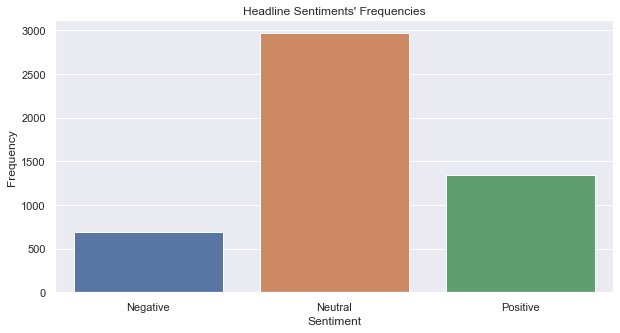

In [138]:
# Arno
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(rc={'figure.figsize':(10,5)})
sentimentFrequencyBarplot = sb.barplot(data=sentimentDistribution,x="Sentiment",y="Frequency").set(title="Headline Sentiments' Frequencies")

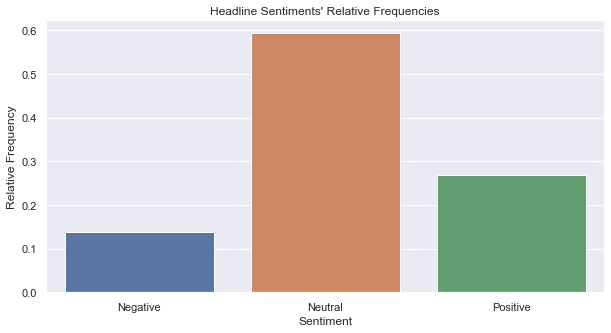

In [139]:
# Arno
# now make the barplot
sentimentRelativeFrequencyBarplot = sb.barplot(data=sentimentDistribution,x="Sentiment",y="Relative Frequency").set(title="Headline Sentiments' Relative Frequencies")

In [140]:
data.reindex(copy=False)
z= data.loc[589,"cleaned_headline"]
print(z)

589    finnish telecom software developer tecnoman oy...
589    congress pass defense spending bill quickly ai...
Name: cleaned_headline, dtype: object


### Counting words relevant to sentiment

In [145]:
#Ethan
#Removed words used just for EDA and analysis of word count
removed_words = ["EUR","eur",":","(",")",",","$","-","Oyj","oyj","mn","mln","In","%","m",".",'"',"'","million","euro"]

cleaned_counted_words = pd.DataFrame(data)
cleaned_counted_words['cleaned_headline'] = cleaned_counted_words['cleaned_headline'].apply(lambda x: ' '.join([word for word in x.split() if (word not in removed_words and not any(map(str.isdigit, word)))]))


#separating into three dataframes based on sentiment
clean_count_negative = cleaned_counted_words[cleaned_counted_words["sentiment"] == -1]
clean_count_positive = cleaned_counted_words[cleaned_counted_words["sentiment"] == 1]
clean_count_neutral = cleaned_counted_words[cleaned_counted_words["sentiment"] == 0]

In [146]:
#Ethan
#counts most common words present in each dataset
from collections import Counter
count_words_negative = Counter(" ".join(clean_count_negative["cleaned_headline"]).split()).most_common(20)
count_words_positive = Counter(" ".join(clean_count_positive["cleaned_headline"]).split()).most_common(20)
count_words_neutral = Counter(" ".join(clean_count_neutral["cleaned_headline"]).split()).most_common(20)

#Renames columns
counted_negative_df = pd.DataFrame.from_dict(count_words_negative)
counted_negative_df.columns = ['word','instances']
counted_positive_df = pd.DataFrame.from_dict(count_words_positive)
counted_positive_df.columns = ['word','instances']
counted_neutral_df = pd.DataFrame.from_dict(count_words_neutral)
counted_neutral_df.columns = ['word','instances']


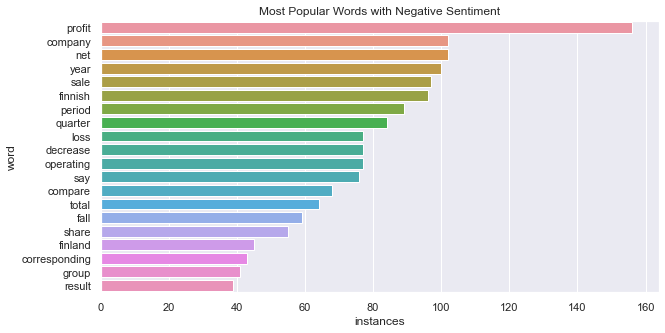

In [147]:
#Ethan
#Opens newplots
import matplotlib.pyplot as plt
plt.close("all")
#fig = plt.figure()
#fig.patch.set_facecolor('white')

#counted_negative_df.plot(kind = 'barh',x='word', y='instances', title='Most Popular Words with Negative Sentiment')
ax = sb.barplot(x = 'instances', y = 'word', data = counted_negative_df).set(title='Most Popular Words with Negative Sentiment')

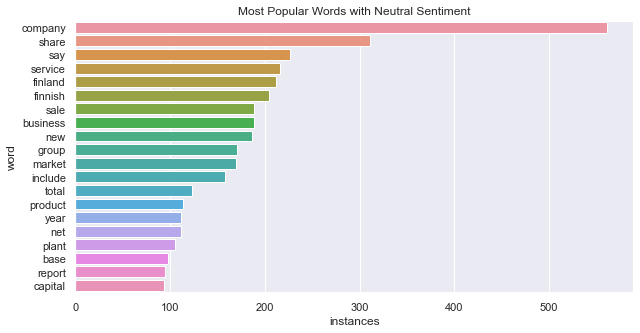

In [148]:
#Ethan
ax = sb.barplot(x = 'instances', y = 'word', data = counted_neutral_df).set(title='Most Popular Words with Neutral Sentiment')

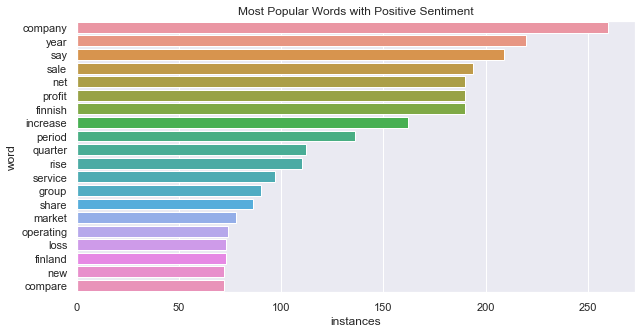

In [149]:
#Ethan
ax = sb.barplot(x = 'instances', y = 'word', data = counted_positive_df).set(title='Most Popular Words with Positive Sentiment')

### Word Cloud

In [150]:
# Arno
from wordcloud import WordCloud # source: https://github.com/amueller/word_cloud  documentation: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
from wordcloud import STOPWORDS
from matplotlib.pyplot import figure

In [151]:
# Arno
allWordsFromData = ""
for h in data["cleaned_headline"]:
    allWordsFromData += " " + h

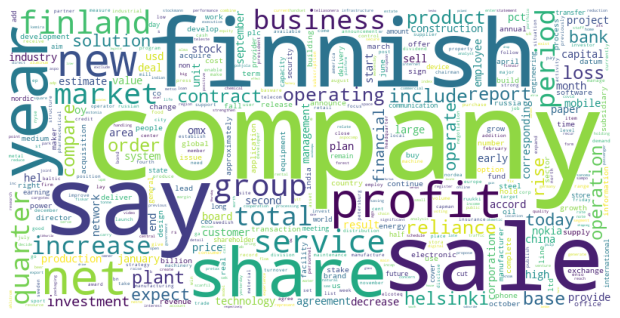

In [157]:
#figure(figsize=(20,10)) #bigger
figure(dpi=80) #will fit in report
wordcloud = WordCloud(background_color="white",width=800,height=400,collocations=False,max_words=500,stopwords=["million","euro"]+list(STOPWORDS)).generate(allWordsFromData)
#wordcloud = WordCloud(background_color="white",width=800,height=400,collocations=False,max_words=500,stopwords=["million","euro"]+list(STOPWORDS)).generate(allWordsFromData)
plt.axis("off")
plt.imshow(wordcloud)

In [153]:
# Arno
print(wordcloud.words_)

{'company': 1.0, 'say': 0.5547128927410617, 'finnish': 0.5308775731310943, 'sale': 0.5200433369447454, 'share': 0.48970747562296857, 'year': 0.466955579631636, 'profit': 0.4387865655471289, 'net': 0.43661971830985913, 'new': 0.3629469122426869, 'finland': 0.35752979414951247, 'service': 0.35102925243770317, 'group': 0.3271939328277356, 'market': 0.29252437703141926, 'business': 0.2838569880823402, 'period': 0.28169014084507044, 'quarter': 0.27518959913326113, 'total': 0.26218851570964247, 'increase': 0.2372697724810401, 'operating': 0.20151679306608883, 'include': 0.20043336944745396, 'reliance': 0.19284940411700974, 'product': 0.18851570964247022, 'contract': 0.17768147345612134, 'loss': 0.17551462621885158, 'report': 0.17551462621885158, 'helsinki': 0.1733477789815818, 'operation': 0.17009750812567714, 'plant': 0.1646803900325027, 'compare': 0.16251354279523295, 'order': 0.15926327193932827, 'base': 0.15926327193932827, 'solution': 0.1581798483206934, 'today': 0.1570964247020585, 'ex

### N-grams

In [154]:
for h in cleaned_counted_words["cleaned_headline"]:
    print(h)

accord gran company plan production russia company grow
technopoli plan develop stage area square meter order host company work computer technology telecommunication statement say
new production plant company increase capacity meet expect increase demand improve use raw material increase production profitability
accord company update strategy year basware target long term net sale growth range operate profit margin net sale
financing aspocomp growth aspocomp aggressively pursue growth strategy increasingly focus technologically demanding hdi print circuit board pcb
quarter componenta net sale double period year early move zero pre tax profit pre tax loss
quarter net sale increase operating profit
operating profit rise corresponding period represent net sale
operating profit total represent net sale
teliasonera tlsn say offer line strategy increase ownership core business holding strengthen eesti telekom offer customer
stora enso norske skog real upm kymmene credit suisse boston cfsb ra

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arnod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


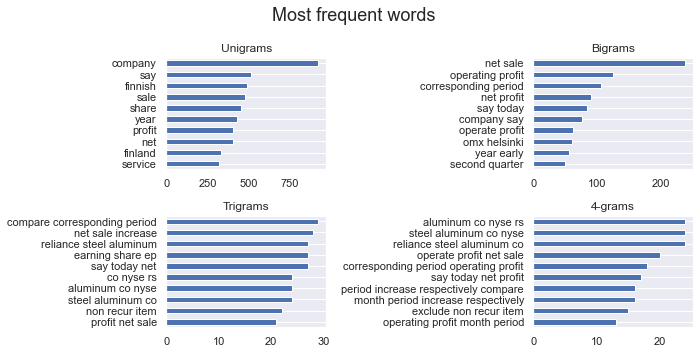

In [155]:
import nltk
nltk.download('punkt')

tokens = nltk.tokenize.word_tokenize(data["cleaned_headline"].str.cat(sep=" "))
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.suptitle("Most frequent words", fontsize=18)

top10 = 10
## unigrams (1-grams)
data_1_grams = pd.DataFrame(nltk.FreqDist(tokens).most_common(), columns=["Word","Freq"])
data_1_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="Unigrams", ax=ax[0, 0], legend=False).grid(axis='x')
ax[0, 0].set(ylabel=None)

## bigrams (2-grams)
data_2_grams = pd.DataFrame(nltk.FreqDist(nltk.ngrams(tokens, 2)).most_common(), columns=["Word","Freq"])
data_2_grams["Word"] = data_2_grams["Word"].apply(lambda x: " ".join(string for string in x))
data_2_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="Bigrams", ax=ax[0, 1], legend=False).grid(axis='x')
ax[0, 1].set(ylabel=None)

## trigrams (3-grams)
data_3_grams = pd.DataFrame(nltk.FreqDist(nltk.ngrams(tokens, 3)).most_common(), columns=["Word","Freq"])
data_3_grams["Word"] = data_3_grams["Word"].apply(lambda x: " ".join(string for string in x))
data_3_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="Trigrams", ax=ax[1, 0], legend=False).grid(axis='x')
ax[1, 0].set(ylabel=None)

## (4-grams)
data_4_grams = pd.DataFrame(nltk.FreqDist(nltk.ngrams(tokens, 4)).most_common(), columns=["Word","Freq"])
data_4_grams["Word"] = data_4_grams["Word"].apply(lambda x: " ".join(string for string in x))
data_4_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="4-grams", ax=ax[1, 1], legend=False).grid(axis='x')
ax[1, 1].set(ylabel=None)

# ## (5-grams)
# data_5_grams = pd.DataFrame(nltk.FreqDist(nltk.ngrams(tokens, 5)).most_common(), columns=["Word","Freq"])
# data_5_grams["Word"] = data_5_grams["Word"].apply(lambda x: " ".join(string for string in x))
# data_5_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="5-grams", ax=ax[2, 0], legend=False).grid(axis='x')
# ax[2, 0].set(ylabel=None)

# ## (6-grams)
# data_6_grams = pd.DataFrame(nltk.FreqDist(nltk.ngrams(tokens, 6)).most_common(), columns=["Word","Freq"])
# data_6_grams["Word"] = data_6_grams["Word"].apply(lambda x: " ".join(string for string in x))
# data_6_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="6-grams", ax=ax[2, 1], legend=False).grid(axis='x')
# ax[2, 1].set(ylabel=None)

fig.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arnod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


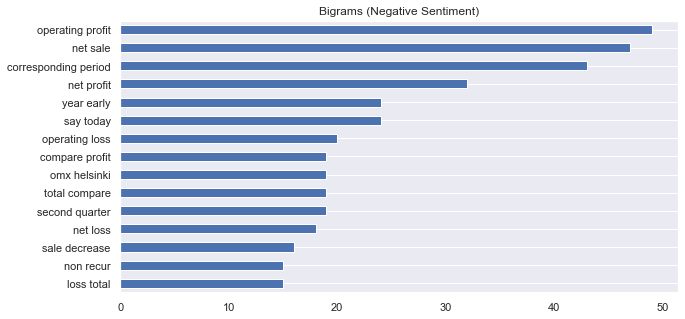

In [158]:
import nltk
nltk.download('punkt')

negative_tokens = nltk.tokenize.word_tokenize(data[data["sentiment"] ==-1]["cleaned_headline"].str.cat(sep=" "))
neutral_tokens = nltk.tokenize.word_tokenize(data[data["sentiment"] == 0]["cleaned_headline"].str.cat(sep=" "))
positive_tokens = nltk.tokenize.word_tokenize(data[data["sentiment"] == 1]["cleaned_headline"].str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=1)

top = 15

## bigrams (2-grams)
data_2_grams_neg = pd.DataFrame(nltk.FreqDist(nltk.ngrams(negative_tokens, 2)).most_common(), columns=["Word","Freq"])
data_2_grams_neg["Word"] = data_2_grams_neg["Word"].apply(lambda x: " ".join(string for string in x))
data_2_grams_neg.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(kind="barh", title="Bigrams (Negative Sentiment)", ax=ax, legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()

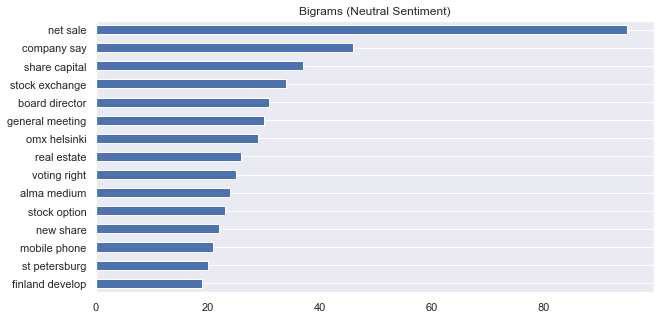

In [159]:
fig, ax = plt.subplots(nrows=1, ncols=1)
data_2_grams_neu = pd.DataFrame(nltk.FreqDist(nltk.ngrams(neutral_tokens, 2)).most_common(), columns=["Word","Freq"])
data_2_grams_neu["Word"] = data_2_grams_neu["Word"].apply(lambda x: " ".join(string for string in x))
data_2_grams_neu.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(kind="barh", title="Bigrams (Neutral Sentiment)", ax=ax, legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()

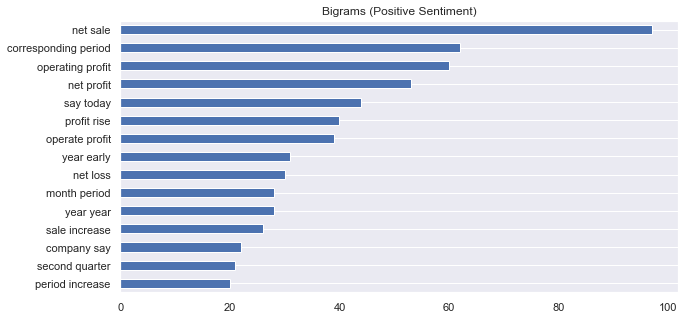

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=1)
data_2_grams_pos = pd.DataFrame(nltk.FreqDist(nltk.ngrams(positive_tokens, 2)).most_common(), columns=["Word","Freq"])
data_2_grams_pos["Word"] = data_2_grams_pos["Word"].apply(lambda x: " ".join(string for string in x))
data_2_grams_pos.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(kind="barh", title="Bigrams (Positive Sentiment)", ax=ax, legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()

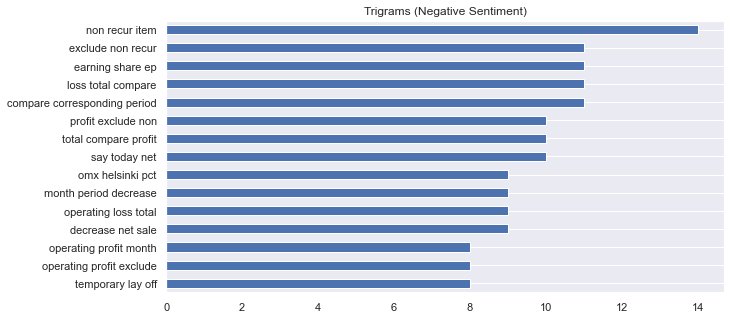

In [161]:
## trigrams (3-grams)
fig, ax = plt.subplots(nrows=1, ncols=1)
data_3_grams_neg = pd.DataFrame(nltk.FreqDist(nltk.ngrams(negative_tokens, 3)).most_common(), columns=["Word","Freq"])
data_3_grams_neg["Word"] = data_3_grams_neg["Word"].apply(lambda x: " ".join(string for string in x))
data_3_grams_neg.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(kind="barh", title="Trigrams (Negative Sentiment)", ax=ax, legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()

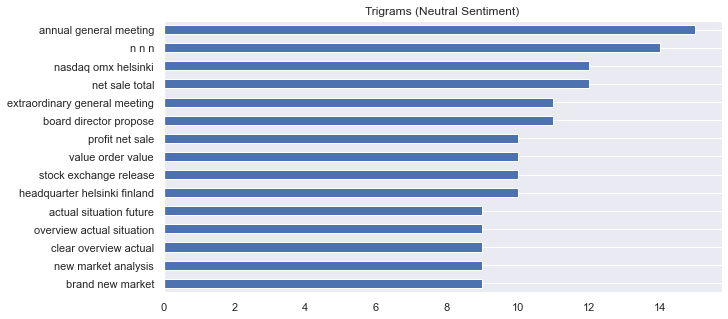

In [162]:
fig, ax = plt.subplots(nrows=1, ncols=1)
data_3_grams_neu = pd.DataFrame(nltk.FreqDist(nltk.ngrams(neutral_tokens, 3)).most_common(), columns=["Word","Freq"])
data_3_grams_neu["Word"] = data_3_grams_neu["Word"].apply(lambda x: " ".join(string for string in x))
data_3_grams_neu.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(kind="barh", title="Trigrams (Neutral Sentiment)", ax=ax, legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()

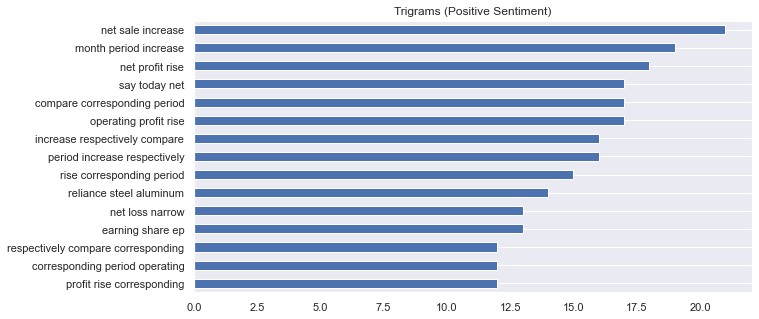

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=1)
data_3_grams_pos = pd.DataFrame(nltk.FreqDist(nltk.ngrams(positive_tokens, 3)).most_common(), columns=["Word","Freq"])
data_3_grams_pos["Word"] = data_3_grams_pos["Word"].apply(lambda x: " ".join(string for string in x))
data_3_grams_pos.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(kind="barh", title="Trigrams (Positive Sentiment)", ax=ax, legend=False).grid(axis='x')
ax.set(ylabel=None)
plt.show()